In [242]:
#Authors:
#Emir Aydın S020843
#Isam Barghoti S018912

In [243]:
import pandas as pd

import numpy as np
import sklearn 
import seaborn as sns

In [244]:
from tqdm.notebook import tqdm
import os
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [245]:
df=pd.read_csv("cards.csv")

In [246]:
df = df[df.filepaths.str.endswith('.jpg')]
df

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train
...,...,...,...,...,...
8150,52,valid/two of spades/1.jpg,two of spades,two,valid
8151,52,valid/two of spades/2.jpg,two of spades,two,valid
8152,52,valid/two of spades/3.jpg,two of spades,two,valid
8153,52,valid/two of spades/4.jpg,two of spades,two,valid


In [247]:
df["class index"]

0        0
1        0
2        0
3        0
4        0
        ..
8150    52
8151    52
8152    52
8153    52
8154    52
Name: class index, Length: 8154, dtype: int64

In [248]:
card_types= df['card type'].unique().size
card_labels= df['labels'].unique().size

print(f"Number of card types  : {card_types:2d}\n"
      f"Number of card labels : {card_labels:2d}")

Number of card types  : 14
Number of card labels : 53


In [249]:
import PIL

In [250]:
img_train_df=df.loc[df['data set']=="train",'filepaths']
labels_train_df=df.loc[df['data set'] == "train", 'labels']
img_test_df= df.loc[df['data set']=="test",'filepaths']
labels_test_df=df.loc[df['data set']=="test",'labels']
img_valid_df=df.loc[df['data set']=="valid",'filepaths']
labels_valid_df=df.loc[df['data set']=="valid",'labels']

img_path_train = np.array(img_train_df)
labels_train = np.array(labels_train_df)
img_path_test=np.array(img_test_df)
labels_test=np.array(labels_test_df)
img_path_valid=np.array(img_valid_df)
labels_valid=np.array(labels_valid_df)

print(len(labels_train_df))
print(len(img_test_df))

7624
265


In [251]:
img_path_train.shape

(7624,)

In [252]:
labels_test.shape

(265,)

In [253]:
images_training = []
images_test= []
images_val= []

In [254]:
#df_train_set

In [255]:
##df_val_set["card type"].unique().size

In [256]:
##df_train_set.drop(['data set'],axis=1,inplace=False)

In [257]:
import matplotlib.pyplot as plt
import cv2

In [258]:
def read_img(root_dir, relative_path):
    abs_path = os.path.join(root_dir, relative_path)
    img_64x64= cv2.imread(abs_path)
    img_64x64= cv2.resize(img_64x64,(64,64))
    return img_64x64 #PIL.Image.open(abs_path)

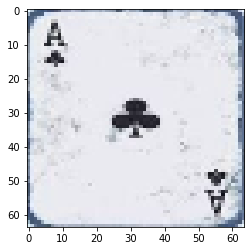

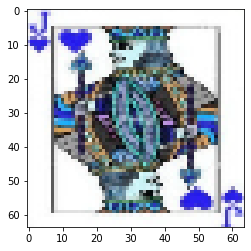

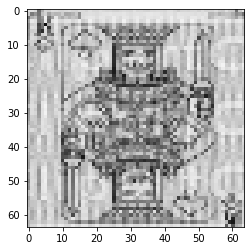

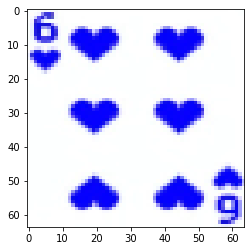

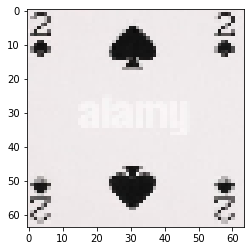

In [259]:
root="./Dataset/"
indexesof_rnd=np.array([119,2799,3587,5678,7554])
for index in indexesof_rnd:   
    rp=img_path_train[index]
    img1=read_img(root,rp)
    plt.imshow(img1)
    plt.show()
    


In [260]:

def Normalize_img(imagePath):
    root="./Dataset/"
    im = read_img(root,imagePath)
    #Normalization
    im_normalized= cv2.normalize(im, None, 0, 1.0,
      cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    #pix_val = np.array(im.getdata(),dtype=float)/255
    return im_normalized

images_training = []
images_test= []
images_val= []

for image in img_path_train:
    images_training.append(Normalize_img(image))
    
for image in img_path_test:
    images_test.append(Normalize_img(image))
    
for image in img_path_valid:
    images_val.append(Normalize_img(image))

images_training = np.array(images_training)
images_test=np.array(images_test)
images_val=np.array(images_val)
#print(images_test)
print("Test shape is",images_test.shape)
print(len(images_test))
print(len(images_test[0]))


Test shape is (265, 64, 64, 3)
265
64


In [261]:
# Converting training
nsamples,px,px2,tr=images_training.shape
images_train2=images_training.reshape((nsamples,px*px2*tr))
print("New Train shape is",images_train2.shape)
# Converting validation
nsamples,px,px2,tr=images_val.shape
images_val2=images_val.reshape((nsamples,px*px2*tr))
print("New Validation shape is",images_val2.shape)
# Converting test
nsamples,px,px2,tr=images_test.shape
images_test2=images_test.reshape((nsamples,px*px2*tr))
print("New Test shape is",images_test2.shape)

New Train shape is (7624, 12288)
New Validation shape is (265, 12288)
New Test shape is (265, 12288)


In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [263]:
from sklearn.decomposition import PCA

In [264]:
pca_95 = PCA(n_components=0.95)
# Fitting the PCA object to the data
pca_95.fit(images_train2)
# Get the number of components required to explain P% of the variance
n_components = pca_95.n_components_ # number of components
print("Number of components required to explain 95% of the variance: {}".format(n_components))

Number of components required to explain 95% of the variance: 1063


In [265]:
pca_95_train=pca_95.transform(images_train2)
pca_95_val=pca_95.transform(images_val2)
pca_95_test=pca_95.transform(images_test2)
pca_95_train.shape

(7624, 1063)

In [266]:
# Decision Tree without PCA
dtc=DecisionTreeClassifier()
dtc.fit(images_train2,labels_train)
labels_pred_dtc=dtc.predict(images_test2)


First 10 Instance Prediction of Decision Tree: 


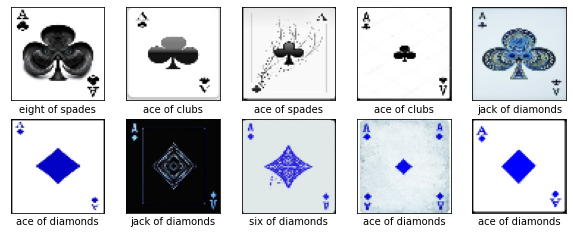

In [267]:
plt.figure(figsize=(10,10))
print("First 10 Instance Prediction of Decision Tree: ")
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.resize(images_test2[i,:],(64,64,3)), cmap=plt.cm.binary)
    plt.xlabel(labels_pred_dtc[i])
plt.show()

In [268]:
acc_dtc=accuracy_score(labels_pred_dtc,labels_test)
print(classification_report(labels_pred_dtc,labels_test))

                   precision    recall  f1-score   support

     ace of clubs       0.40      0.50      0.44         4
  ace of diamonds       0.60      0.50      0.55         6
    ace of hearts       0.80      0.50      0.62         8
    ace of spades       0.60      0.60      0.60         5
   eight of clubs       0.40      1.00      0.57         2
eight of diamonds       0.40      0.25      0.31         8
  eight of hearts       0.60      0.43      0.50         7
  eight of spades       0.20      0.14      0.17         7
    five of clubs       0.40      0.50      0.44         4
 five of diamonds       0.60      0.25      0.35        12
   five of hearts       0.20      1.00      0.33         1
   five of spades       0.60      0.43      0.50         7
    four of clubs       0.40      0.50      0.44         4
 four of diamonds       0.60      0.60      0.60         5
   four of hearts       0.20      0.12      0.15         8
   four of spades       0.40      0.67      0.50       

In [269]:
print("Accuracy of the Decision Tree: ",accuracy_score(labels_pred_dtc,labels_test))

Accuracy of the Decision Tree:  0.3471698113207547


In [270]:
print(confusion_matrix(labels_pred_dtc,labels_test))

[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 1 1]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]]


NameError: name 'dtc' is not defined

In [271]:
def plot_confusion_matrix(y_test, y_predicted):  
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_predicted))  
    fig = plt.figure(figsize=(25, 15))  
    sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt="g")  
    plt.title("Confusion Matrix")  
    plt.xlabel("Predicted Label")  
    plt.ylabel("True Label")  
    plt.show()  
 

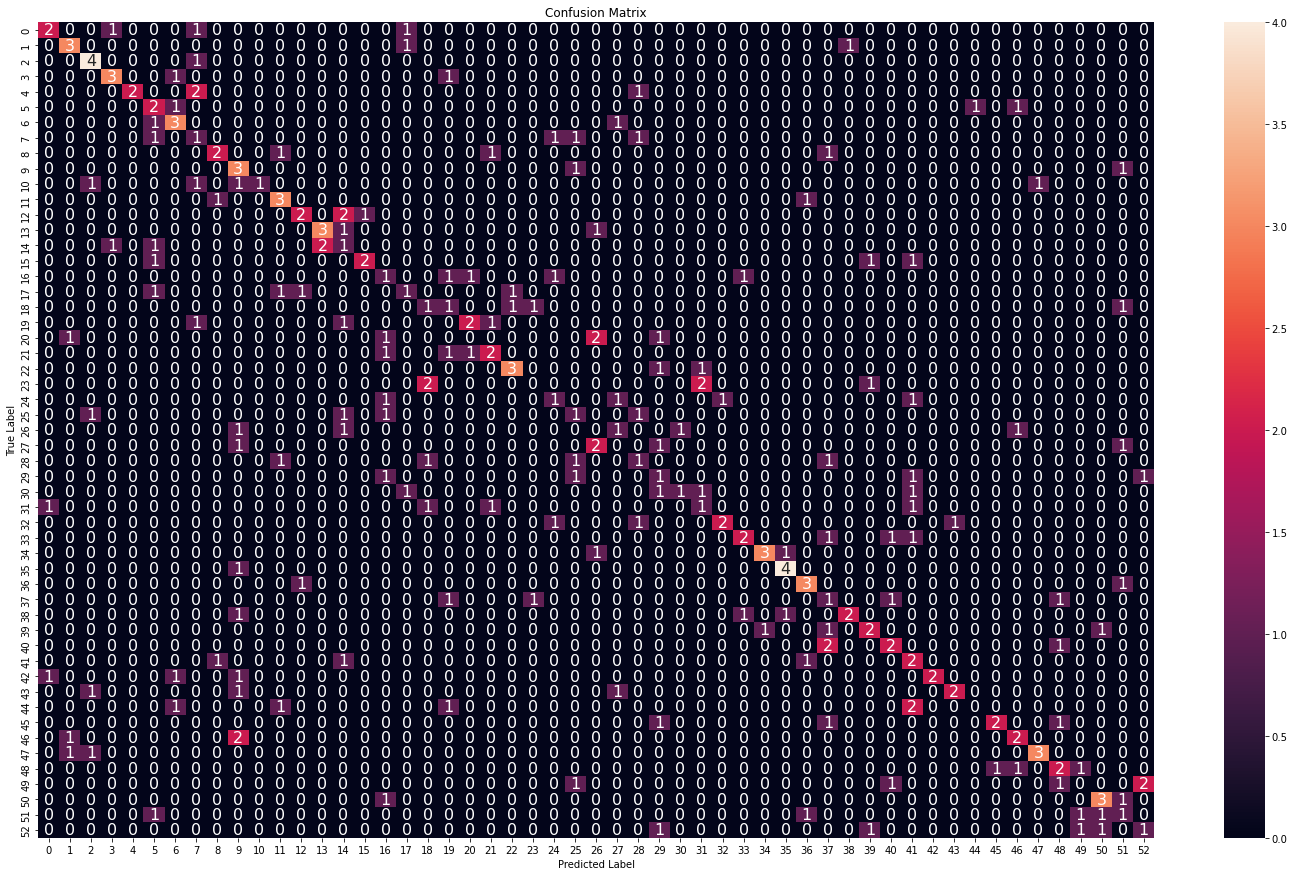

In [272]:
plot_confusion_matrix(labels_test, labels_pred_dtc)  

In [273]:
# Random Forest without PCA
rndf=RandomForestClassifier()
rndf.fit(images_train2,labels_train)
labels_pred_rndf=rndf.predict(images_test2)

First 10 Instance Prediction of Random Forest: 


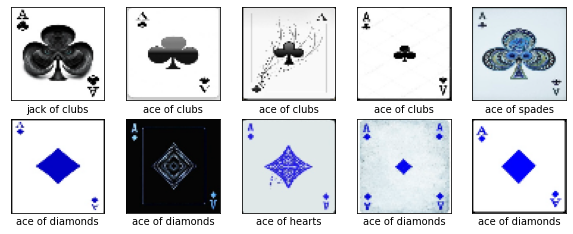

In [274]:
plt.figure(figsize=(10,10))
print("First 10 Instance Prediction of Random Forest: ")
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.resize(images_test2[i,:],(64,64,3)), cmap=plt.cm.binary)
    plt.xlabel(labels_pred_rndf[i])
plt.show()

In [275]:
acc_rnd=accuracy_score(labels_pred_rndf,labels_test)
print(classification_report(labels_pred_rndf,labels_test))

                   precision    recall  f1-score   support

     ace of clubs       0.60      0.33      0.43         9
  ace of diamonds       0.80      1.00      0.89         4
    ace of hearts       0.80      0.33      0.47        12
    ace of spades       0.80      0.36      0.50        11
   eight of clubs       0.60      0.38      0.46         8
eight of diamonds       0.40      0.50      0.44         4
  eight of hearts       0.60      0.75      0.67         4
  eight of spades       0.60      0.50      0.55         6
    five of clubs       0.20      0.25      0.22         4
 five of diamonds       0.80      0.33      0.47        12
   five of hearts       0.20      1.00      0.33         1
   five of spades       0.20      0.33      0.25         3
    four of clubs       0.20      0.33      0.25         3
 four of diamonds       0.40      0.40      0.40         5
   four of hearts       0.40      0.50      0.44         4
   four of spades       0.40      0.50      0.44       

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [276]:
print("Accuracy of the Random Forest: ",accuracy_score(labels_pred_rndf,labels_test))

Accuracy of the Random Forest:  0.5169811320754717


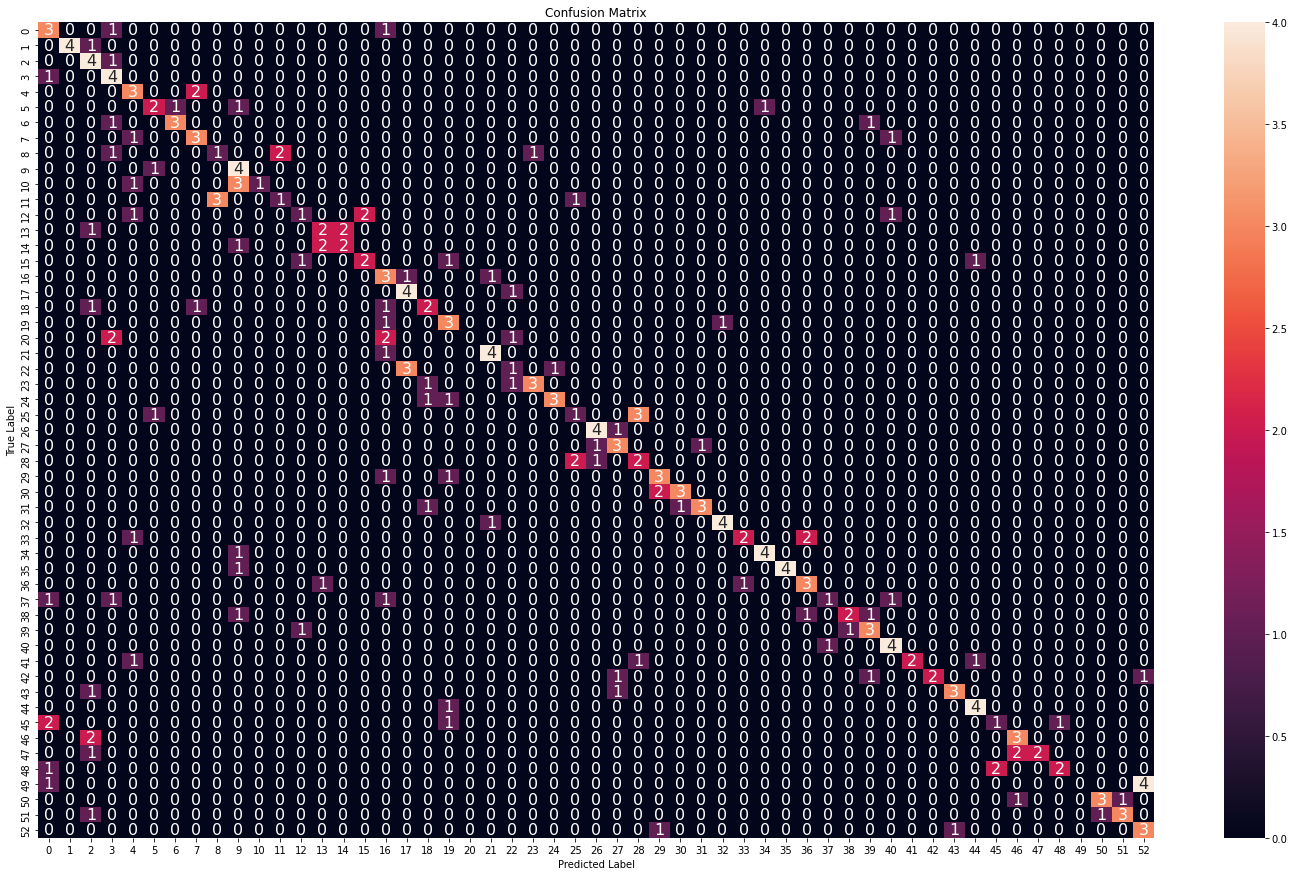

In [277]:
plot_confusion_matrix(labels_test, labels_pred_rndf) 

In [278]:
# Decision Tree with PCA_95
dtc_pca=DecisionTreeClassifier()
dtc_pca.fit(pca_95_train,labels_train)
labels_pred_dtc_pca95=dtc_pca.predict(pca_95_test)

In [279]:
acc_dtc_pca95=accuracy_score(labels_pred_dtc_pca95,labels_test)
print(classification_report(labels_pred_dtc_pca95,labels_test))

                   precision    recall  f1-score   support

     ace of clubs       0.40      0.33      0.36         6
  ace of diamonds       0.40      0.40      0.40         5
    ace of hearts       0.60      0.60      0.60         5
    ace of spades       0.40      0.29      0.33         7
   eight of clubs       0.40      0.33      0.36         6
eight of diamonds       0.20      0.25      0.22         4
  eight of hearts       0.40      0.18      0.25        11
  eight of spades       0.20      0.20      0.20         5
    five of clubs       0.40      0.50      0.44         4
 five of diamonds       0.40      0.29      0.33         7
   five of hearts       0.20      0.25      0.22         4
   five of spades       0.20      0.17      0.18         6
    four of clubs       0.20      0.50      0.29         2
 four of diamonds       0.20      0.25      0.22         4
   four of hearts       0.40      0.33      0.36         6
   four of spades       0.20      0.50      0.29       

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [280]:
# Random Forest with PCA_95
rndf_pca=RandomForestClassifier()
rndf_pca.fit(pca_95_train,labels_train)
labels_pred_rndf_pca95=rndf_pca.predict(pca_95_test)

In [281]:
acc_rndf_pca95=accuracy_score(labels_pred_rndf_pca95,labels_test)
print(classification_report(labels_pred_rndf_pca95,labels_test))

                   precision    recall  f1-score   support

     ace of clubs       0.40      0.40      0.40         5
  ace of diamonds       1.00      0.56      0.71         9
    ace of hearts       0.40      0.25      0.31         8
    ace of spades       0.80      0.24      0.36        17
   eight of clubs       0.40      0.29      0.33         7
eight of diamonds       0.40      0.50      0.44         4
  eight of hearts       0.40      0.40      0.40         5
  eight of spades       0.40      0.67      0.50         3
    five of clubs       0.20      0.11      0.14         9
 five of diamonds       0.60      0.23      0.33        13
   five of hearts       0.20      0.50      0.29         2
   five of spades       0.00      0.00      0.00         2
    four of clubs       0.20      0.20      0.20         5
 four of diamonds       0.20      0.25      0.22         4
   four of hearts       0.40      0.67      0.50         3
   four of spades       0.40      0.33      0.36       

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [282]:
accuracies=np.array([acc_dtc,acc_rnd,acc_dtc_pca95,acc_rndf_pca95])

In [283]:
acc_arr=np.resize(accuracies,(2,2))
accuracy_table=pd.DataFrame(acc_arr, columns=['Decision Tree', 'Random Forest'], 
                            index=['With whole dataset','With 1063 components'])
accuracy_table

,Decision Tree,Random Forest
With whole dataset,0.347170,0.516981
With 1063 components,0.249057,0.426415


In [286]:
dtc_probas=dtc.predict_proba(images_test2)
rndf_probas=rndf.predict_proba(images_test2)
dtc_pca_probas=dtc_pca.predict_proba(pca_95_test)
rndf_pca_probas=rndf_pca.predict_proba(pca_95_test)

# keep probabilities for the positive outcome only
dtc_proba_positive=dtc_probas[:,1]
rndf_proba_positive=rndf_probas[:,1]
dtc_pca_proba_positive=dtc_pca_probas[:,1]
rndf_pca_proba_positive=rndf_pca_probas[:,1]


In [292]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelBinarizer

In [293]:
label_binarizer = LabelBinarizer().fit(labels_train)
y_onehot_test = label_binarizer.transform(labels_test)
y_onehot_test.shape  # (n_samples, n_classes)

(265, 53)

In [305]:
class_of_interest = "five of diamonds"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

9

In [306]:
from sklearn.metrics import RocCurveDisplay

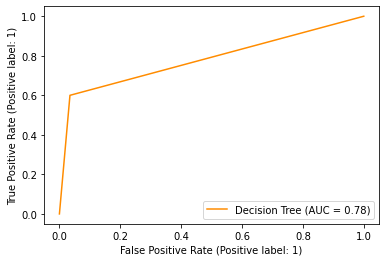

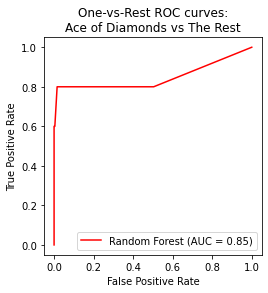

In [308]:
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    dtc_probas[:, class_id],
    name=f"Decision Tree",
    color="darkorange",
)
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    rndf_probas[:, class_id],
    name=f"Random Forest",
    color="red",
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nAce of Diamonds vs The Rest")
plt.legend()
plt.show()

In [329]:
import torch as torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import torchvision.transforms as T

In [330]:
def reader(root_dir, relative_path):
    abs_path = os.path.join(root_dir, relative_path)
    return PIL.Image.open(abs_path)

In [331]:
class CardsDataset(torch.utils.data.Dataset):
    def __init__(self, data_frame, root_dir, partition):
        super(CardsDataset, self).__init__()
        self.data_frame = data_frame[data_frame['data set'] == partition]
        self.root_dir = root_dir

        self.lbl_to_int = {
            lbl: i for i, lbl
            in enumerate(self.data_frame['labels'].unique())
        }

        self.crt_to_int = {
            crt: i for i, crt
            in enumerate(self.data_frame['card type'].unique())
        }

        self.to_crt = {
            v: k for k, v in self.crt_to_int.items()
        }

        self.to_lbl = {
            v: k for k, v in self.lbl_to_int.items()
        }

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        row = self.data_frame.iloc[idx]

        relative_path = row.filepaths
        img = reader(self.root_dir, relative_path)
        img = TF.to_tensor(img)

        lbl = row['labels']
        lbl = self.lbl_to_int[lbl]

        crt = row['card type']
        crt = self.crt_to_int[crt]

        return img, lbl, crt

    def inverse(self, x, y1, y2):
        return (
            TF.to_pil_image(x),
            self.to_lbl[y1], self.to_crt[y2]
        )

In [332]:
DATA_DIR = root

trn_set = CardsDataset(df, DATA_DIR, 'train')
vld_set = CardsDataset(df, DATA_DIR, 'valid')
tst_set = CardsDataset(df, DATA_DIR, 'test' )

In [333]:
BATCH_SIZE = 32

trn_loader = torch.utils.data.DataLoader(trn_set, batch_size=BATCH_SIZE, shuffle=True)
vld_loader = torch.utils.data.DataLoader(trn_set, batch_size=BATCH_SIZE, shuffle=False)
tst_loader = torch.utils.data.DataLoader(trn_set, batch_size=BATCH_SIZE, shuffle=False)

In [334]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cpu')

In [335]:
def CNNBlock(in_channels, out_channels, kernel_size, padding='same'):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()
    )

class MultiScaleCNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_sizes):
        super(MultiScaleCNNBlock, self).__init__()
        self.convolutions = nn.ModuleList([
            CNNBlock(in_channels, in_channels, k)
            for k in kernel_sizes
        ])
        self.fusion = CNNBlock(in_channels * (1 + len(kernel_sizes)),
                               out_channels, kernel_size=(1,1))

    def forward(self, x):
        y = torch.cat([x]+[m(x) for m in self.convolutions], dim=-3)
        y = self.fusion(y)
        return y

def CNNBackbone(model_depth=5, base_layer_depth=16, multiplier=2):
    layers = [
        MultiScaleCNNBlock(3, base_layer_depth, [2,3,4,5])
    ]
    for i in range(model_depth):
        layers += [
            MultiScaleCNNBlock(
                in_channels=base_layer_depth*(2**i),
                out_channels=base_layer_depth*(2**(i+1)),
                kernel_sizes=[3,4,5]
            ),
            nn.MaxPool2d((multiplier, multiplier))
        ]
    return nn.Sequential(*layers)

class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes):
        super(Classifier, self).__init__()
        self.hidden = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU()
        )
        self.final = nn.Sequential(
            nn.Linear(hidden_size, n_classes),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        x = x.flatten(start_dim=-3)
        y = self.hidden(x)
        y = self.final(y)
        return y

class CNNClassifier(nn.Module):
    def __init__(self, backbone, clf_lbl, clf_crt):
        super(CNNClassifier, self).__init__()
        self.backbone = backbone
        self.clf_lbl  = clf_lbl
        self.clf_crt  = clf_crt

    def forward(self, x):
        y = self.backbone(x)
        y1 = self.clf_lbl(y)
        y2 = self.clf_crt(y)
        return y1, y2


In [336]:
class CardFlip(nn.Module):
    def __init__(self):
        super(CardFlip, self).__init__()

    def forward(self, x):
        return TF.rotate(x, 180.)

class RandomApply(nn.Module):
    def __init__(self, module, prob=0.5):
        super(RandomApply, self).__init__()
        self.module = module
        self.prob   = nn.Parameter(torch.tensor(prob))

    def forward(self, x):
        x_ = self.module(x)
        return torch.where(torch.rand(x.size(0), device=x.device).view(x.size(0),1,1,1) < self.prob,
            x_,
            x
        )

class ImageAugmentation(nn.Module):
    def __init__(self, prob=0.5, rot=10., shear=10., distortion=.2, hue=.1,
                       saturation=.3, brightness=.3, contrast=.3):
        super(ImageAugmentation, self).__init__()
        self.prob = prob

        self.transform = nn.Sequential(
            # PHOTOMETRIC
            RandomApply(
                T.ColorJitter(brightness=brightness),
                prob=prob),
            RandomApply(
                T.ColorJitter(contrast=contrast),
                prob=prob),
            RandomApply(
                T.ColorJitter(saturation=saturation),
                prob=prob),
            RandomApply(
                T.ColorJitter(hue=hue),
                prob=prob),

            # GEOMETRIC
            RandomApply(
                module=CardFlip(),
                prob=prob),
            RandomApply(
                T.RandomPerspective(distortion_scale=distortion, p=1.),
                prob=prob),
            RandomApply(
                module=T.RandomAffine(degrees=rot),
                prob=prob),
            RandomApply(
                module=T.RandomAffine(degrees=0., shear=shear),
                prob=prob)
        )

    def forward(self, x):
        return self.transform(x)

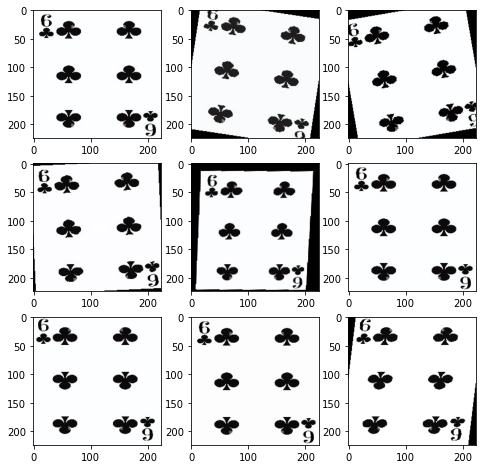

In [337]:
plt.figure(figsize=(8,8))
howmany = 3
augmentor = ImageAugmentation(prob=.2).to(DEVICE)

for x, _, _ in trn_loader:
    x = x[:1].to(DEVICE)
    plt.subplot(howmany, howmany, 1)
    plt.imshow(TF.to_pil_image(x[0]))

    for i in range(1, howmany**2):
        x_aug = augmentor(x)
        img  = TF.to_pil_image(x_aug[0])
        plt.subplot(howmany,howmany,i+1)
        plt.imshow(img)

    break

In [338]:
def correct_predictions(prediction, target):
    return (prediction.argmax(dim=-1) == target.argmax(dim=-1)).sum()

def move_to_device(*args):
    return [
        arg.to(DEVICE) for arg in args
    ]

In [339]:
x_sample = torch.ones([1, 3, 224, 224], dtype=torch.float32, device=DEVICE)
backbone = CNNBackbone(model_depth=5, base_layer_depth=16, multiplier=2).to(DEVICE)
y_sample = backbone(x_sample)
y_sample.size()
flat_size = y_sample.size(-1) * y_sample.size(-2) * y_sample.size(-3)
clf_lbl = Classifier(flat_size, hidden_size=256, n_classes=card_labels).to(DEVICE)
clf_crt = Classifier(flat_size, hidden_size=128, n_classes=card_types).to(DEVICE)
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
cnn_clf = CNNClassifier(backbone, clf_lbl, clf_crt)

In [340]:
optimizer = torch.optim.Adam(
    params=cnn_clf.parameters(),
    lr=3e-4
)
loss_fn = nn.CrossEntropyLoss()

In [341]:
max_epochs = 25
acc_lbl = 0.
diz_loss = {'train_loss':[],'val_loss':[]}
accur=np.array([]);
for epoch in range(max_epochs):
    cnn_clf.train()
    with tqdm(total=len(trn_set), file=sys.stdout) as pbar:
        for i, (x, y1, y2) in enumerate(trn_loader):
            x, y1, y2 = move_to_device(x, y1, y2)
            n = float(x.size(0))
            
            y1 = F.one_hot(y1, card_labels).float()
            y2 = F.one_hot(y2, card_types).float()
            
            x = augmentor(x)
            
            optimizer.zero_grad()
            
            fx1, fx2 = cnn_clf(x)
            
            loss_lbl = loss_fn(fx1, y1)
            loss_crt = loss_fn(fx2, y2)
            loss = loss_lbl + loss_crt #+ acc_lbl * loss_consistency
            
            loss.backward()
            
            optimizer.step()
            pbar.set_description(f'Batch passed: {i+1}')
            pbar.update(n)
           
    cnn_clf.eval()
    loss_lbl = 0.
    loss_crt = 0.
    acc_lbl = 0.
    acc_crt = 0.
    total = 0.
    for i, (x, y1, y2) in enumerate(vld_loader):
        with torch.no_grad():
            x, y1, y2 = move_to_device(x, y1, y2)
            n = float(x.size(0))
            total += n
            y1 = F.one_hot(y1, card_labels).float()
            y2 = F.one_hot(y2, card_types).float()
            fx1, fx2 = cnn_clf(x)
            loss_lbl += (n * loss_fn(fx1, y1))
            loss_crt += (n * loss_fn(fx2, y2))
            acc_lbl  += float(correct_predictions(fx1, y1))
            acc_crt  += float(correct_predictions(fx2, y2))
    loss_lbl /= total
    loss_crt /= total
    acc_lbl  /= total
    acc_crt  /= total
    accur=np.append(accur,acc_lbl)
    diz_loss['train_loss'].append(loss)
    diz_loss['val_loss'].append(loss_lbl+loss_crt)
    print(f'EPOCH{epoch+1:4d} LOSS_LBL: {loss_lbl:.5f} LOSS_CRT: {loss_crt:.5f}',
        f'ACC_LBL: {acc_lbl:.2%} ACC_CRT: {acc_crt:.2%}')

  0%|          | 0/7624 [00:00<?, ?it/s]

EPOCH   1 LOSS_LBL: 3.67114 LOSS_CRT: 2.10494 ACC_LBL: 37.60% ACC_CRT: 71.13%


  0%|          | 0/7624 [00:00<?, ?it/s]

EPOCH   2 LOSS_LBL: 3.47851 LOSS_CRT: 1.98543 ACC_LBL: 57.44% ACC_CRT: 80.73%


  0%|          | 0/7624 [00:00<?, ?it/s]

EPOCH   3 LOSS_LBL: 3.33303 LOSS_CRT: 1.92271 ACC_LBL: 73.14% ACC_CRT: 86.24%


  0%|          | 0/7624 [00:00<?, ?it/s]

EPOCH   4 LOSS_LBL: 3.22584 LOSS_CRT: 1.86744 ACC_LBL: 81.52% ACC_CRT: 90.65%


  0%|          | 0/7624 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,8))
plt.semilogy(accur, label='accuracy',color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.grid()
plt.legend()
#plt.title('loss')
plt.show()